In [2]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from collections import namedtuple
import warnings

warnings.filterwarnings("ignore")

np.random.seed(42)

In [3]:
train_data = pd.read_csv(r"data/train.csv")
test_data = pd.read_csv(r"data/test.csv")

In [4]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [6]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [8]:

def nan_imputer(data, columns):
    for column in columns:
        imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
        data[column]=imputer.fit_transform(data[column].values.reshape(-1,1))
    return data

In [9]:
train_data = nan_imputer(train_data, ["Age"])
test_data = nan_imputer(test_data, ["Age"])

In [10]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [11]:
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [12]:
test_passenger_id=test_data["PassengerId"]

In [13]:
def drop_not_concerned(data, columns):
    return data.drop(columns, axis=1)

not_concerned_columns = ["PassengerId","Name", "Ticket", "Fare", "Cabin", "Embarked"]
train_data = drop_not_concerned(train_data, not_concerned_columns)
test_data = drop_not_concerned(test_data, not_concerned_columns)

In [14]:
train_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch
0,0,3,male,22.0,1,0
1,1,1,female,38.0,1,0
2,1,3,female,26.0,0,0
3,1,1,female,35.0,1,0
4,0,3,male,35.0,0,0


In [15]:
test_data.head()

,Pclass,Sex,Age,SibSp,Parch
0,3,male,34.5,0,0
1,3,female,47.0,1,0
2,2,male,62.0,0,0
3,3,male,27.0,0,0
4,3,female,22.0,1,1


In [16]:
def dummy_data(data, columns):
    for column in columns:
        data = pd.concat([data, pd.get_dummies(data[column], prefix=column)], axis=1)
        data = data.drop(column, axis=1)
    return data


dummy_columns = ["Pclass"]
train_data=dummy_data(train_data, dummy_columns)
test_data=dummy_data(test_data, dummy_columns)

In [17]:
test_data.head()

,Sex,Age,SibSp,Parch,Pclass_1,Pclass_2,Pclass_3
0,male,34.5,0,0,0,0,1
1,female,47.0,1,0,0,0,1
2,male,62.0,0,0,0,1,0
3,male,27.0,0,0,0,0,1
4,female,22.0,1,1,0,0,1


In [18]:
def sex_to_int(data):
    le = LabelEncoder()
    le.fit(["male","female"])
    data["Sex"]=le.transform(data["Sex"]) 
    return data

train_data = sex_to_int(train_data)
test_data = sex_to_int(test_data)
train_data.head()

,Survived,Sex,Age,SibSp,Parch,Pclass_1,Pclass_2,Pclass_3
0,0,1,22.0,1,0,0,0,1
1,1,0,38.0,1,0,1,0,0
2,1,0,26.0,0,0,0,0,1
3,1,0,35.0,1,0,1,0,0
4,0,1,35.0,0,0,0,0,1


In [19]:
def split_valid_test_data(data, fraction=(1 - 0.8)):
    data_y = data["Survived"]
    lb = LabelBinarizer()
    data_y = lb.fit_transform(data_y)

    data_x = data.drop(["Survived"], axis=1)

    train_x, valid_x, train_y, valid_y = train_test_split(data_x, data_y, test_size=fraction)

    return train_x.values, train_y, valid_x, valid_y

train_x, train_y, valid_x, valid_y = split_valid_test_data(train_data)

In [20]:
def build_neural_network(hidden_units=10):
    tf.reset_default_graph()
    inputs = tf.placeholder(tf.float32, shape=[None, train_x.shape[1]])
    labels = tf.placeholder(tf.float32, shape=[None, 1])
    learning_rate = tf.placeholder(tf.float32)
    is_training=tf.Variable(True,dtype=tf.bool)
    
    initializer = tf.contrib.layers.xavier_initializer()
    fc = tf.layers.dense(inputs, hidden_units, activation=None,kernel_initializer=initializer)
    fc=tf.layers.batch_normalization(fc, training=is_training)
    fc=tf.nn.relu(fc)
    
    logits = tf.layers.dense(fc, 1, activation=None)
    cross_entropy = tf.nn.sigmoid_cross_entropy_with_logits(labels=labels, logits=logits)
    cost = tf.reduce_mean(cross_entropy)
    
    with tf.control_dependencies(tf.get_collection(tf.GraphKeys.UPDATE_OPS)):
        optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)

    predicted = tf.nn.sigmoid(logits)
    correct_pred = tf.equal(tf.round(predicted), labels)
    accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32))
    
    export_nodes = ['inputs', 'labels', 'learning_rate','is_training', 'logits',
                    'cost', 'optimizer', 'predicted', 'accuracy']
    Graph = namedtuple('Graph', export_nodes)
    local_dict = locals()
    graph = Graph(*[local_dict[each] for each in export_nodes])

    return graph

In [21]:
model = build_neural_network()

The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.

Instructions for updating:
Use keras.layers.dense instead.
Instructions for updating:
Use keras.layers.BatchNormalization instead.  In particular, `tf.control_dependencies(tf.GraphKeys.UPDATE_OPS)` should not be used (consult the `tf.keras.layers.batch_normalization` documentation).
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [22]:
def get_batch(data_x,data_y,batch_size=32):
    batch_n=len(data_x)//batch_size
    
    for i in range(batch_n):
        batch_x=data_x[i*batch_size:(i+1)*batch_size]
        batch_y=data_y[i*batch_size:(i+1)*batch_size]
        
        yield batch_x,batch_y

In [23]:
epochs = 200
train_collect = 50
train_print=train_collect*2

learning_rate_value = 0.001
batch_size=16

x_collect = []
train_loss_collect = []
train_acc_collect = []
valid_loss_collect = []
valid_acc_collect = []

saver = tf.train.Saver()
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    iteration=0
    for e in range(epochs):
        for batch_x,batch_y in get_batch(train_x,train_y,batch_size):
            iteration+=1
            feed = {model.inputs: train_x,
                    model.labels: train_y,
                    model.learning_rate: learning_rate_value,
                    model.is_training:True
                   }
            train_loss, _, train_acc = sess.run([model.cost, model.optimizer, model.accuracy], feed_dict=feed)
            
            if iteration % train_collect == 0:
                x_collect.append(e)
                train_loss_collect.append(train_loss)
                train_acc_collect.append(train_acc)

                if iteration % train_print==0:
                     print("Epoch: {}/{}".format(e + 1, epochs),
                      "Train Loss: {:.4f}".format(train_loss),
                      "Train Acc: {:.4f}".format(train_acc))
                        
                feed = {model.inputs: valid_x,
                        model.labels: valid_y,
                        model.is_training:False
                       }
                val_loss, val_acc = sess.run([model.cost, model.accuracy], feed_dict=feed)
                valid_loss_collect.append(val_loss)
                valid_acc_collect.append(val_acc)
                
                if iteration % train_print==0:
                    print("Epoch: {}/{}".format(e + 1, epochs),
                      "Validation Loss: {:.4f}".format(val_loss),
                      "Validation Acc: {:.4f}".format(val_acc))
                

    saver.save(sess, "./titanic.ckpt")

Epoch: 3/200 Train Loss: 0.6114 Train Acc: 0.6980
Epoch: 3/200 Validation Loss: 0.6924 Validation Acc: 0.4637
Epoch: 5/200 Train Loss: 0.4900 Train Acc: 0.8034
Epoch: 5/200 Validation Loss: 0.7306 Validation Acc: 0.5642
Epoch: 7/200 Train Loss: 0.4450 Train Acc: 0.8132
Epoch: 7/200 Validation Loss: 0.5810 Validation Acc: 0.7654
Epoch: 10/200 Train Loss: 0.4254 Train Acc: 0.8258
Epoch: 10/200 Validation Loss: 0.4966 Validation Acc: 0.7821
Epoch: 12/200 Train Loss: 0.4130 Train Acc: 0.8315
Epoch: 12/200 Validation Loss: 0.4584 Validation Acc: 0.7989
Epoch: 14/200 Train Loss: 0.4070 Train Acc: 0.8343
Epoch: 14/200 Validation Loss: 0.4522 Validation Acc: 0.8101
Epoch: 16/200 Train Loss: 0.4037 Train Acc: 0.8329
Epoch: 16/200 Validation Loss: 0.4421 Validation Acc: 0.8268
Epoch: 19/200 Train Loss: 0.4009 Train Acc: 0.8357
Epoch: 19/200 Validation Loss: 0.4328 Validation Acc: 0.8324
Epoch: 21/200 Train Loss: 0.3985 Train Acc: 0.8357
Epoch: 21/200 Validation Loss: 0.4291 Validation Acc: 0.826

Epoch: 169/200 Train Loss: 0.3625 Train Acc: 0.8413
Epoch: 169/200 Validation Loss: 0.4628 Validation Acc: 0.8101
Epoch: 171/200 Train Loss: 0.3624 Train Acc: 0.8413
Epoch: 171/200 Validation Loss: 0.4662 Validation Acc: 0.8045
Epoch: 173/200 Train Loss: 0.3619 Train Acc: 0.8441
Epoch: 173/200 Validation Loss: 0.4836 Validation Acc: 0.8045
Epoch: 175/200 Train Loss: 0.3618 Train Acc: 0.8441
Epoch: 175/200 Validation Loss: 0.4732 Validation Acc: 0.8045
Epoch: 178/200 Train Loss: 0.3617 Train Acc: 0.8441
Epoch: 178/200 Validation Loss: 0.4738 Validation Acc: 0.8045
Epoch: 180/200 Train Loss: 0.3616 Train Acc: 0.8441
Epoch: 180/200 Validation Loss: 0.4726 Validation Acc: 0.8101
Epoch: 182/200 Train Loss: 0.3615 Train Acc: 0.8455
Epoch: 182/200 Validation Loss: 0.4719 Validation Acc: 0.8101
Epoch: 185/200 Train Loss: 0.3614 Train Acc: 0.8455
Epoch: 185/200 Validation Loss: 0.4739 Validation Acc: 0.8101
Epoch: 187/200 Train Loss: 0.3613 Train Acc: 0.8455
Epoch: 187/200 Validation Loss: 0.47

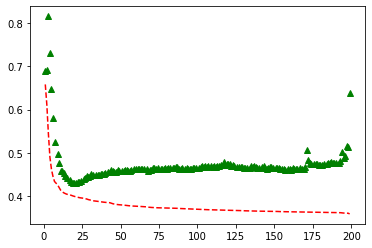

In [24]:
plt.plot(x_collect, train_loss_collect, "r--")
plt.plot(x_collect, valid_loss_collect, "g^")
plt.show()

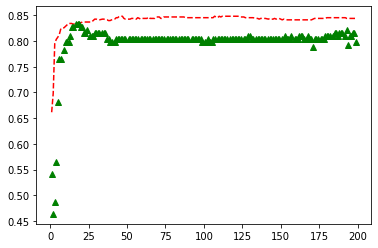

In [25]:
plt.plot(x_collect, train_acc_collect, "r--")
plt.plot(x_collect, valid_acc_collect, "g^")
plt.show()

In [26]:
model=build_neural_network()
restorer=tf.train.Saver()
with tf.Session() as sess:
    restorer.restore(sess,"./titanic.ckpt")
    feed={
        model.inputs:test_data,
        model.is_training:False
    }
    test_predict=sess.run(model.predicted,feed_dict=feed)
    
test_predict[:10]

Instructions for updating:
Use standard file APIs to check for files with this prefix.
INFO:tensorflow:Restoring parameters from ./titanic.ckpt


array([[9.2683733e-03],
       [5.7975382e-02],
       [4.3657422e-04],
       [1.2729877e-01],
       [5.2368885e-01],
       [1.5474892e-01],
       [3.6362058e-01],
       [1.0236800e-02],
       [2.6317465e-01],
       [9.4119757e-02]], dtype=float32)